<a href="https://colab.research.google.com/github/Matsumo-chi/ActionGame/blob/master/%E5%BF%9C%E7%94%A8%E7%B5%B1%E8%A8%88%E6%9C%80%E7%B5%82%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#リクルート職業

##準備

In [0]:
#matplotlibで日本語を使うための準備
!rm /root/.cache/matplotlib/fontlist-v310.json
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,436 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

***ランタイム再起動***

In [0]:
!ls /root/.cache/matplotlib/
!grep IPAGothic /root/.cache/matplotlib/fontlist-v310.json

fontList.json  fontlist-v310.json  tex.cache
      "name": "IPAGothic",
      "name": "IPAGothic",


In [0]:
#ライブラリの宣言
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAGothic'
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['font.family']

!wget https://qa.fujimura.com/tmp/bx6rhg9.csv
#csvファイル(1227_ver2019.csv)の読み込み
x = pd.read_csv('bx6rhg9.csv', index_col=0)

--2020-01-17 07:08:04--  https://qa.fujimura.com/tmp/bx6rhg9.csv
Resolving qa.fujimura.com (qa.fujimura.com)... 35.227.191.95
Connecting to qa.fujimura.com (qa.fujimura.com)|35.227.191.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52997658 (51M) [text/csv]
Saving to: ‘bx6rhg9.csv’

bx6rhg9.csv         100%[===================>]  50.54M  51.7MB/s    in 1.0s    

2020-01-17 07:08:05 (51.7 MB/s) - ‘bx6rhg9.csv’ saved [52997658/52997658]



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (356,486,487) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **前処理**

In [0]:
#半角空白をNaNに置き換える
x1 = x.replace(' ', np.nan)
#主に働いている人のみを抽出
x2 = x1.query('Y18_Q17 <=2')
#すべてNaNを削除する 行方向
work = x2.dropna(how='any', axis=1)
#列を抽出
work = work.loc[:,['Y18_Q1','Y18_Q2',"Y18_Q9","Y18_Q10","Y18_Q33","Y18_Q34","Y18_Q35","Y18_Q36","Y18_Q40_2","Y18_Q47","Y18_Q52","Y18_Q53","Y18_Q58","Y18_Q59","Y18_Q60_1","Y18_Q60_2","Y18_Q60_3","Y18_Q60_4","Y18_Q60_5","Y18_Q60_6","Y18_Q60_7","Y18_Q60_8","Y18_Q67_1","Y18_Q67_2","Y18_Q67_3","Y18_Q67_4","Y18_Q67_5","Y18_Q67_6","Y18_Q69_1","Y18_Q98_1"]]
#すべて同じ値のカラムがあれば項目を削除する
work.max() == work.min()
#objectをint64に直す
work = work.astype('int64')

#ストレス値を計算してカラムを追加する　小さいほどよくない
work['ストレス値'] = work['Y18_Q60_1']+work['Y18_Q60_2']+work['Y18_Q60_3']+work['Y18_Q60_4']+work['Y18_Q60_5']+work['Y18_Q60_6']+work['Y18_Q60_7']+work['Y18_Q60_8']/8
#職場環境値を計算してカラムを追加する　小さい程よくない
work['職場環境値'] = work['Y18_Q67_1']+work['Y18_Q67_2']+work['Y18_Q67_3']+work['Y18_Q67_4']+work['Y18_Q67_5']+work['Y18_Q67_6']/6


In [0]:
work = work.drop(['Y18_Q60_1','Y18_Q60_2',"Y18_Q60_3","Y18_Q60_4","Y18_Q60_5","Y18_Q60_6","Y18_Q60_7","Y18_Q60_8",'Y18_Q67_1','Y18_Q67_2',"Y18_Q67_3","Y18_Q67_4","Y18_Q67_5","Y18_Q67_6"],axis=1)

#（ミス防止のおまじない）
print('データの形式:{}'.format(work.shape))
print('欠損の数:{}'.format(work.isnull().sum().sum()))
#objectをint64に直す
work = work.astype('int64')
#print('データ型の確認　\n{}\n'.format(work.dtypes))

データの形式:(34793, 18)
欠損の数:0


In [0]:
#なんのデータかよくわからないためラベルに名前を付ける
work.columns = ['性別','年齢','結婚','子供','業種','従業員規模','職種','役職',"1週間の労働時間","テレワーク",'幸福度','生活満足度','休暇取得状況','有給休暇取得率',"仕事そのものに満足",'年収','ストレス値','職場環境値']
work.head()

,性別,年齢,結婚,子供,業種,従業員規模,職種,役職,1週間の労働時間,テレワーク,幸福度,生活満足度,休暇取得状況,有給休暇取得率,仕事そのものに満足,年収,ストレス値,職場環境値
PKEY,,,,,,,,,,,,,,,,,,
16100000003,1,27,1,2,15,6,89,8,60,3,3,2,1,3,2,300,25,18
16100000006,1,46,1,2,53,6,56,6,56,3,2,2,2,5,2,550,28,18
16100000008,1,54,1,1,48,12,93,8,50,1,3,4,3,5,3,550,24,20
16100000011,1,30,2,2,28,12,70,8,36,3,3,3,1,3,4,260,26,23
16100000012,1,34,2,2,50,6,84,7,60,3,3,2,4,5,3,500,20,12


# 可視化
ざっくり分布を見てみる

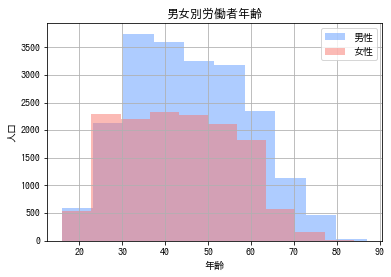

In [0]:
#データ全体の男女別年齢割合を表示する
男性 = work[work["性別"] == 1]
女性 = work[work["性別"] == 2]

男性["年齢"].hist(color="#5F9BFF", alpha=.5,label="男性")
女性["年齢"].hist(color="#F8766D", alpha=.5,label="女性")
plt.title("男女別労働者年齢")
plt.xlabel("年齢")
plt.ylabel("人口")
plt.legend()

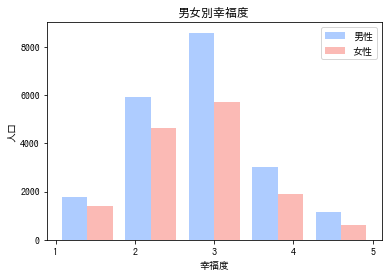

In [0]:
#幸福度分布
M = 男性["幸福度"]
F  = 女性["幸福度"]
plt.hist([M,F],alpha=.5, stacked=False,color=["#5F9BFF", "#F8766D"],label=["男性","女性"],bins = 5)
plt.xticks( [1,2,3,4,5])
plt.title("男女別幸福度")
plt.xlabel("幸福度")
plt.ylabel("人口")
plt.legend()


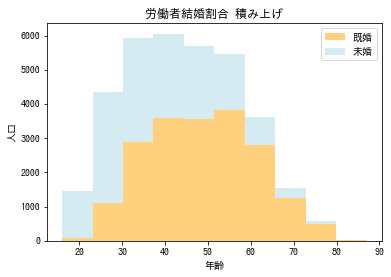

In [0]:
#結婚している人の割合
既婚 = work[work["結婚"] == 1]
未婚 = work[work["結婚"] == 2]

married = 既婚["年齢"]
unmarried = 未婚["年齢"]
plt.hist([married,unmarried],alpha=.5, stacked=True,color=['orange', 'lightblue'],label=["既婚","未婚"],histtype="barstacked")
plt.title("労働者結婚割合 積み上げ")
plt.xlabel("年齢")
plt.ylabel("人口")

plt.legend()

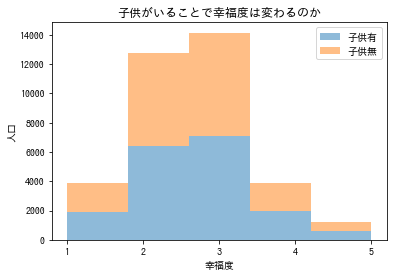

In [0]:
#子供分布
child = work[work["子供"] == 1]
unchild = work[work["子供"] == 2]

H1 = child["幸福度"]
H2  = child["幸福度"]
S1 = child["生活満足度"]
S2  = child["生活満足度"]

plt.hist([H1,H2],alpha=.5,label=["子供有","子供無"],histtype="barstacked",bins = 5)
plt.xticks( [1,2,3,4,5])
plt.title("子供がいることで幸福度は変わるのか")
plt.xlabel("幸福度")
plt.ylabel("人口")
plt.legend()

In [0]:
#年収データがある人のみを抽出
work_income = work[work['年収'] != 99999]
#objectをint64に直す
work_income = work_income.astype('int64')

print("年収未記入：",work.shape)
print("年収データ有：",work_income.shape)

年収未記入： (34793, 18)
年収データ有： (33939, 18)


年収平均： 366.2142373081116
男性年収平均： 454.07428914697635
女性年収平均： 240.5182983599513
最低年収： 1
最高年収： 5000


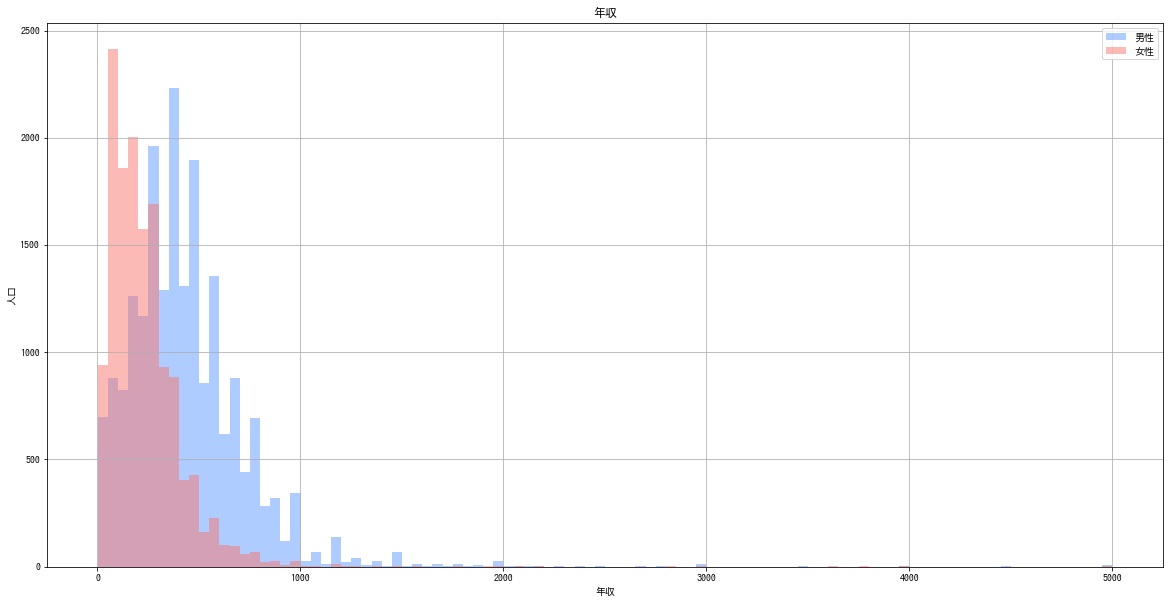

In [0]:
男性 = work_income[work_income["性別"] == 1]
女性 = work_income[work_income["性別"] == 2]
plt.figure(figsize=(20, 10))
男性["年収"].hist(color="#5F9BFF", alpha=.5,label="男性",bins=100,range=(1, 5000))
女性["年収"].hist(color="#F8766D", alpha=.5,label="女性",bins=100,range=(1, 5000))

plt.title("年収")
plt.xlabel("年収")
plt.ylabel("人口")
plt.legend()
all = work_income["年収"].mean()
m = 男性["年収"].mean()
f = 女性["年収"].mean()
print("年収平均：",all)
print("男性年収平均：",m)
print("女性年収平均：",f)
print("最低年収：",work_income['年収'].min())
print("最高年収：",work_income['年収'].max())

In [0]:
#年収4000以上の人どんな人が取り出してみる
work_income[work_income['年収'] > 4000]

,性別,年齢,結婚,子供,業種,従業員規模,職種,役職,1週間の労働時間,テレワーク,幸福度,生活満足度,休暇取得状況,有給休暇取得率,仕事そのものに満足,年収,ストレス値,職場環境値
PKEY,,,,,,,,,,,,,,,,,,
16100025963,1,25,2,2,23,7,32,8,40,2,1,1,2,6,3,5000,28,14
16100036368,1,79,1,1,37,12,41,1,35,3,1,1,1,1,1,5000,34,19
16100038792,1,62,1,2,17,12,31,7,40,3,3,2,1,2,4,4500,30,24
16100048454,2,24,2,2,25,5,224,8,45,3,2,2,2,1,2,5000,27,25
16100050800,1,35,2,2,25,7,30,8,47,3,3,2,2,1,2,5000,34,15
16100051336,1,37,2,2,32,9,28,6,40,4,1,1,1,1,1,5000,33,23
17100046231,1,54,1,1,37,12,40,1,50,3,1,1,3,3,1,5000,26,20
17100047819,1,41,1,1,63,1,191,1,40,3,2,2,1,6,3,5000,24,24
18100046333,1,34,1,1,53,9,183,8,40,3,3,2,1,1,5,5000,23,20


16100025963　ドライバー　 18100046333　看護師
入力ミスっぽい気がする

# 業種前処理

**業種67種を18種に統合**

---

"農林漁業","鉱業","建築業","製造業","電気ガス熱供給水道業","通信通信業","運輸業","卸売業","小売業","保険金融業","不動産業","飲食店宿泊","医療福祉","教育","郵便局","サービス業","公務","他に分類されないもの"

In [0]:
work_income.loc[work_income['業種'] == 4 , '業種'] = 3
work_income.loc[work_income['業種'] == 5 , '業種'] = 3
work_income.loc[work_income['業種'] == 6 , '業種'] = 4
work_income.loc[work_income['業種'] == 7 , '業種'] = 4
work_income.loc[work_income['業種'] == 8 , '業種'] = 4
work_income.loc[work_income['業種'] == 9 , '業種'] = 4
work_income.loc[work_income['業種'] == 10 , '業種'] = 4
work_income.loc[work_income['業種'] == 11 , '業種'] = 4
work_income.loc[work_income['業種'] == 12 , '業種'] = 4
work_income.loc[work_income['業種'] == 13 , '業種'] = 4
work_income.loc[work_income['業種'] == 14 , '業種'] = 4
work_income.loc[work_income['業種'] == 15 , '業種'] = 4
work_income.loc[work_income['業種'] == 16 , '業種'] = 4
work_income.loc[work_income['業種'] == 17 , '業種'] = 4
work_income.loc[work_income['業種'] == 18 , '業種'] = 4
work_income.loc[work_income['業種'] == 19 , '業種'] = 4
work_income.loc[work_income['業種'] == 20 , '業種'] = 4
work_income.loc[work_income['業種'] == 21 , '業種'] = 4
work_income.loc[work_income['業種'] == 22 , '業種'] = 4
work_income.loc[work_income['業種'] == 23 , '業種'] = 4
work_income.loc[work_income['業種'] == 24 , '業種'] = 4
work_income.loc[work_income['業種'] == 25 , '業種'] = 4
work_income.loc[work_income['業種'] == 26 , '業種'] = 5
work_income.loc[work_income['業種'] == 27 , '業種'] = 6
work_income.loc[work_income['業種'] == 28 , '業種'] = 6
work_income.loc[work_income['業種'] == 29 , '業種'] = 6
work_income.loc[work_income['業種'] == 30 , '業種'] = 6
work_income.loc[work_income['業種'] == 31 , '業種'] = 6
work_income.loc[work_income['業種'] == 32 , '業種'] = 7
work_income.loc[work_income['業種'] == 33 , '業種'] = 7
work_income.loc[work_income['業種'] == 34 , '業種'] = 7
work_income.loc[work_income['業種'] == 35 , '業種'] = 7
work_income.loc[work_income['業種'] == 36 , '業種'] = 7
work_income.loc[work_income['業種'] == 37 , '業種'] = 8
work_income.loc[work_income['業種'] == 38 , '業種'] = 9
work_income.loc[work_income['業種'] == 39 , '業種'] = 9
work_income.loc[work_income['業種'] == 40 , '業種'] = 9
work_income.loc[work_income['業種'] == 41 , '業種'] = 9
work_income.loc[work_income['業種'] == 42 , '業種'] = 9
work_income.loc[work_income['業種'] == 43 , '業種'] = 9
work_income.loc[work_income['業種'] == 44 , '業種'] = 10
work_income.loc[work_income['業種'] == 45 , '業種'] = 10
work_income.loc[work_income['業種'] == 46 , '業種'] = 10
work_income.loc[work_income['業種'] == 47 , '業種'] = 10
work_income.loc[work_income['業種'] == 48 , '業種'] = 10
work_income.loc[work_income['業種'] == 49 , '業種'] = 10
work_income.loc[work_income['業種'] == 50 , '業種'] = 11
work_income.loc[work_income['業種'] == 51 , '業種'] = 12
work_income.loc[work_income['業種'] == 52 , '業種'] = 12
work_income.loc[work_income['業種'] == 53 , '業種'] = 13
work_income.loc[work_income['業種'] == 54 , '業種'] = 13
work_income.loc[work_income['業種'] == 55 , '業種'] = 14
work_income.loc[work_income['業種'] == 56 , '業種'] = 15
work_income.loc[work_income['業種'] == 57 , '業種'] = 16
work_income.loc[work_income['業種'] == 58 , '業種'] = 16
work_income.loc[work_income['業種'] == 59 , '業種'] = 16
work_income.loc[work_income['業種'] == 60 , '業種'] = 16
work_income.loc[work_income['業種'] == 61 , '業種'] = 16
work_income.loc[work_income['業種'] == 62 , '業種'] = 16
work_income.loc[work_income['業種'] == 63 , '業種'] = 16
work_income.loc[work_income['業種'] == 64 , '業種'] = 16
work_income.loc[work_income['業種'] == 65 , '業種'] = 16
work_income.loc[work_income['業種'] == 66 , '業種'] = 17
work_income.loc[work_income['業種'] == 67 , '業種'] = 18

# 楽しいお仕事ランキング

In [0]:
industry = work_income.loc[:,['業種','仕事そのものに満足','幸福度','生活満足度','ストレス値','年収']]
industry.head()
#業種平均
industry_mean = industry.groupby('業種').mean()
industry_mean.index = ["農林漁業","鉱業","建築業","製造業","電気ガス熱供給水道業","通信通信業","運輸業","卸売業","小売業","保険金融業","不動産業","飲食店宿泊","医療福祉","教育","郵便局","サービス業","公務","他に分類されないもの"]
#業種分散
industry_var = industry.groupby('業種').var()
industry_var.index = ["農林漁業","鉱業","建築業","製造業","電気ガス熱供給水道業","通信通信業","運輸業","卸売業","小売業","保険金融業","不動産業","飲食店宿泊","医療福祉","教育","郵便局","サービス業","公務","他に分類されないもの"]
#業種標準偏差
industry_std = industry.groupby('業種').std()
industry_std.index = ["農林漁業","鉱業","建築業","製造業","電気ガス熱供給水道業","通信通信業","運輸業","卸売業","小売業","保険金融業","不動産業","飲食店宿泊","医療福祉","教育","郵便局","サービス業","公務","他に分類されないもの"]
print(industry_mean)
#print(industry_var)
#print(industry_std)

            仕事そのものに満足       幸福度     生活満足度      ストレス値          年収
農林漁業         2.768977  2.716172  2.679868  23.943894  240.257426
鉱業           2.916667  2.833333  2.861111  23.500000  367.722222
建築業          2.857943  2.770876  2.751527  23.884420  414.835540
製造業          3.021776  2.797941  2.799122  23.628123  427.643653
電気ガス熱供給水道業   2.872294  2.699134  2.688312  23.731602  434.257576
通信通信業        2.963688  2.823698  2.832776  23.412805  446.396082
運輸業          2.965337  2.846154  2.860874  23.622507  375.351377
卸売業          2.966354  2.729264  2.741002  23.701095  379.535994
小売業          2.910175  2.816996  2.855386  22.988818  231.166232
保険金融業        2.930233  2.686877  2.672757  23.039867  416.068937
不動産業         2.800285  2.629101  2.617689  24.091298  424.041369
飲食店宿泊        2.849364  2.719943  2.757426  22.688826  224.436351
医療福祉         2.891484  2.713462  2.696154  22.282692  334.469505
教育           2.622825  2.572025  2.558803  23.599861  386.840640
郵便局          2.965686  2.

----------業種人口多い順--------
製造業           5924
サービス業         3766
医療福祉          3640
他に分類されないもの    2706
小売業           2683
運輸業           2106
通信通信業         2093
公務            2018
建築業           1964
教育            1437
飲食店宿泊         1414
卸売業           1278
保険金融業         1204
不動産業           701
電気ガス熱供給水道業     462
農林漁業           303
郵便局            204
鉱業              36
dtype: int64


<BarContainer object of 18 artists>

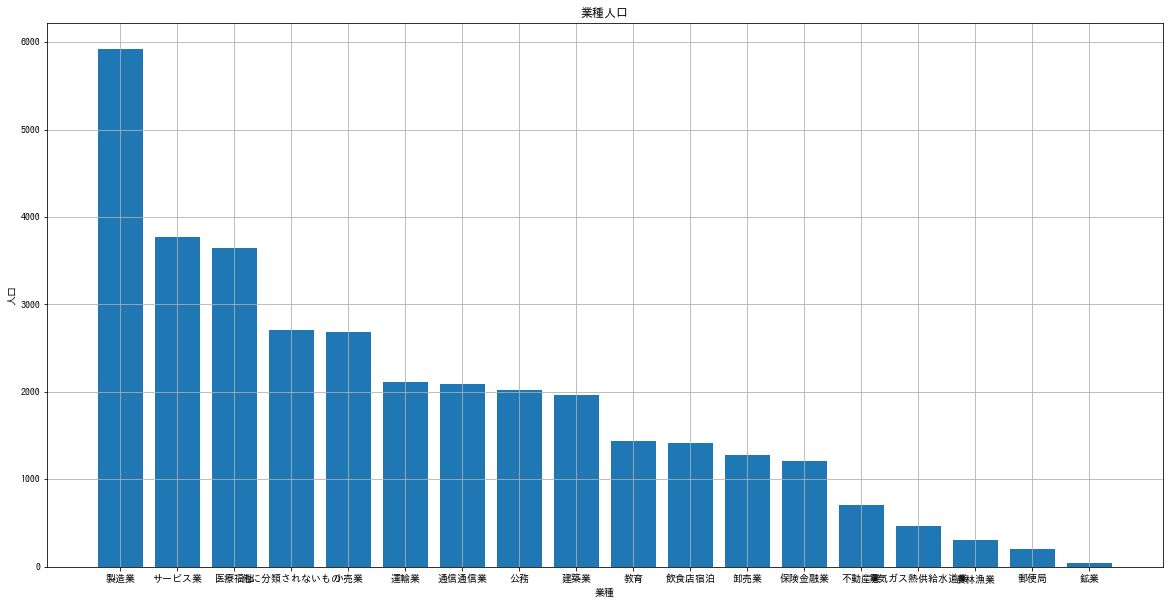

In [0]:
industry_count = work_income.groupby('業種').size()
industry_count.index = ["農林漁業","鉱業","建築業","製造業","電気ガス熱供給水道業","通信通信業","運輸業","卸売業","小売業","保険金融業","不動産業","飲食店宿泊","医療福祉","教育","郵便局","サービス業","公務","他に分類されないもの"]
print("----------業種人口多い順--------")
print(industry_count.sort_values(ascending=False))
# print("---------業種人口少ない順---------")
# print(industry_count.sort_values(ascending=True).head()

plt.figure(figsize=(20, 10))
plt.title("業種人口")
plt.xlabel("業種")
plt.ylabel("人口")
plt.grid(True)
plt.bar(industry_count.sort_values(ascending=False).index,industry_count.sort_values(ascending=False))

In [0]:
industry_income = industry_mean.sort_values(by=["年収"], ascending=False)
print("----------年収多い順--------")
print(industry_income['年収'])
#業種別幸福度　　少ないほうが幸せ
pd.set_option('display.max_rows', 100)
industry_income = industry_mean.sort_values(by=["幸福度"], ascending=True)
print("----------幸福順--------")
print(industry_income['幸福度'])
#生活満足度　少ないほうが幸せ
pd.set_option('display.max_rows', 100)
industry_income = industry_mean.sort_values(by=["生活満足度"], ascending=True)
print("----------生活満足度--------")
print(industry_income['生活満足度'])
#業種別ストレス分布
pd.set_option('display.max_rows', 100)
industry_income = industry_mean.sort_values(by=["ストレス値"], ascending=True)
print("----------高ストレス順--------")
print(industry_income['ストレス値'])

----------年収多い順--------
公務            497.786918
通信通信業         446.396082
電気ガス熱供給水道業    434.257576
製造業           427.643653
不動産業          424.041369
保険金融業         416.068937
建築業           414.835540
教育            386.840640
卸売業           379.535994
運輸業           375.351377
鉱業            367.722222
医療福祉          334.469505
サービス業         331.560011
他に分類されないもの    282.560237
郵便局           281.431373
農林漁業          240.257426
小売業           231.166232
飲食店宿泊         224.436351
Name: 年収, dtype: float64
----------幸福順--------
教育            2.572025
公務            2.591179
不動産業          2.629101
保険金融業         2.686877
電気ガス熱供給水道業    2.699134
医療福祉          2.713462
農林漁業          2.716172
飲食店宿泊         2.719943
卸売業           2.729264
建築業           2.770876
サービス業         2.781997
他に分類されないもの    2.787879
製造業           2.797941
小売業           2.816996
通信通信業         2.823698
鉱業            2.833333
運輸業           2.846154
郵便局           2.965686
Name: 幸福度, dtype: float64
----------生活満足度--------
教育            2

# 機械学習

決定木モデルの構築

In [0]:
#決定木
#二値化する
work_income['仕事満足フラグ'] = work_income['仕事そのものに満足'].map(lambda x:1 if x <= 2 else 0)
print(work_income.groupby('仕事満足フラグ').size())
work_income['幸福度フラグ'] = work_income['幸福度'].map(lambda x:1 if x <= 2 else 0)
print(work_income.groupby('幸福度フラグ').size())
work_income['生活満足度フラグ'] = work_income['生活満足度'].map(lambda x:1 if x <= 2 else 0)
print(work_income.groupby('生活満足度フラグ').size())
work_income['ストレスフラグ'] = work_income['ストレス値'].map(lambda x:1 if x < 24 else 0)
print(work_income.groupby('ストレスフラグ').size())

仕事満足フラグ
0    21154
1    12785
dtype: int64
幸福度フラグ
0    20455
1    13484
dtype: int64
生活満足度フラグ
0    18007
1    15932
dtype: int64
ストレスフラグ
0    16360
1    17579
dtype: int64


In [0]:
WORK_frag = work_income.drop(work_income.columns[4:18],axis=1)
WORK_frag = WORK_frag.drop(work_income.columns[1],axis=1)
WORK_frag['性別'] = WORK_frag['性別'].map(lambda x:1 if x == 1 else 0)
WORK_frag['結婚'] = WORK_frag['結婚'].map(lambda x:1 if x == 1 else 0)
WORK_frag['子供'] = WORK_frag['子供'].map(lambda x:1 if x == 1 else 0)
WORK_frag

,性別,結婚,子供,仕事満足フラグ,幸福度フラグ,生活満足度フラグ,ストレスフラグ
PKEY,,,,,,,
16100000003,1,1,0,1,0,1,0
16100000006,1,1,0,1,1,1,0
16100000008,1,1,1,0,0,0,0
16100000011,1,0,0,0,0,0,0
16100000012,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...
18100054535,1,1,1,0,0,1,1
18100054541,0,0,0,0,0,0,1
18100054544,1,0,0,0,0,0,1


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(WORK_frag.drop("仕事満足フラグ", axis=1), WORK_frag["仕事満足フラグ"])

In [0]:
data= []
for i in range(WORK_frag.shape[1]-1):
    data.append(WORK_frag.drop("仕事満足フラグ", axis=1).columns[i])

In [0]:
tree.export_graphviz(clf, out_file="tree.dot",
                     filled=True, rounded=True,
                     feature_names=data)

In [0]:
with open("tree.dot","r",encoding="utf-8") as file:
  filedata=file.read()
  filedata=filedata.replace("helvetica","IPAGothic")
with open("tree2.dot","w",encoding="utf-8") as file:
  file.write(filedata)

In [0]:
!cat tree2.dot

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=IPAGothic] ;
edge [fontname=IPAGothic] ;
0 [label="生活満足度フラグ <= 0.5\nentropy = 0.956\nsamples = 33939\nvalue = [21154, 12785]", fillcolor="#f5cdb1"] ;
1 [label="幸福度フラグ <= 0.5\nentropy = 0.719\nsamples = 18007\nvalue = [14430, 3577]", fillcolor="#eba06a"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="ストレスフラグ <= 0.5\nentropy = 0.699\nsamples = 16830\nvalue = [13656, 3174]", fillcolor="#eb9e67"] ;
1 -> 2 ;
3 [label="子供 <= 0.5\nentropy = 0.77\nsamples = 6171\nvalue = [4781, 1390]", fillcolor="#eda673"] ;
2 -> 3 ;
4 [label="性別 <= 0.5\nentropy = 0.721\nsamples = 3278\nvalue = [2624, 654]", fillcolor="#eba06a"] ;
3 -> 4 ;
5 [label="結婚 <= 0.5\nentropy = 0.806\nsamples = 920\nvalue = [693, 227]", fillcolor="#eeaa7a"] ;
4 -> 5 ;
6 [label="entropy = 0.782\nsamples = 757\nvalue = [581, 176]", fillcolor="#eda775"] ;
5 -> 6 ;
7 [label="entropy = 0.896\nsamples = 163\nvalue = [112, 51]", fillco

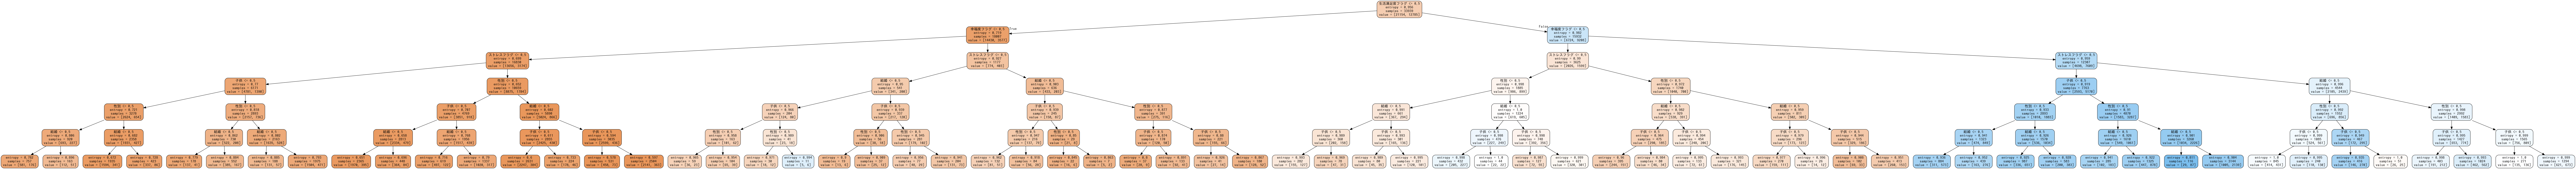

In [0]:
import pydotplus
from IPython.display import Image
 
graph = pydotplus.graphviz.graph_from_dot_file('tree2.dot')
graph.write_png('tree.png')
Image(graph.create_png())

**ロジスティック回帰モデル**

---

目的変数　仕事に満足しているか？

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#説明変数と目的変数の設定
# y = 　仕事満足フラグ　1：満足　0：不満
X = work_income.loc[:,["性別","結婚","子供",'業種','仕事そのものに満足','幸福度','生活満足度','ストレス値','年収']]
y = WORK_frag['仕事満足フラグ']

# 訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0);

#スケーリング
#標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:3f}'.format(model.score(X_test,y_test)))

正解率(train):0.987075
正解率(test):0.987625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
model.coef_

array([[ 4.02555807e+00,  7.06686846e-01,  1.04392266e+00,
         9.87210892e-02, -1.14952186e+01,  3.53171895e-01,
         5.95659614e-01,  4.33929088e-01,  4.30258862e-03]])

# お仕事を当てるモデルをつくりたい

---

八宝菜の分類みたいに分けられるといいな

In [0]:
#x = work_income.loc[:,["性別","結婚","子供",'仕事そのものに満足','幸福度','生活満足度','ストレス値','年収']]
x = work_income.drop(work_income.columns[18:23],axis=1)
x['性別'] = x['性別'].map(lambda x:1 if x == 1 else 0)
x['結婚'] = x['結婚'].map(lambda x:1 if x == 1 else 0)
x['子供'] = x['子供'].map(lambda x:1 if x == 1 else 0)
x

NameError: ignored

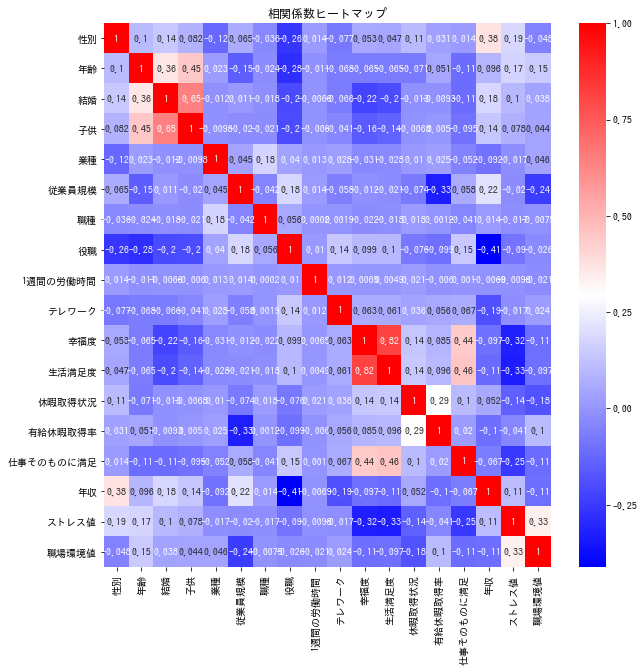

In [0]:
plt.figure(figsize=(10,10))
plt.title("相関係数ヒートマップ")
sns.heatmap(x.corr(),annot=True,cmap='bwr')
plt.show()

In [0]:
x_all = x.drop("業種", axis=1) 
y = x["業種"]
y = pd.DataFrame(y)
y

,業種
PKEY,
16100000003,4
16100000006,13
16100000008,10
16100000011,6
16100000012,11
...,...
18100054535,4
18100054541,13
18100054544,6


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras

x_train, x_test, y_train, y_test = train_test_split(np.asarray(x_all), np.asarray(y), test_size=0.25, shuffle= True)

# The known number of output classes.
num_classes = 19

# Normalize values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 5
x_test /= 5

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

In [0]:
print(x_train.shape)
print(x_test.shape)

(25454, 17)
(8485, 17)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

model = Sequential()

# Achieves 50%
model.add(Dense(64, input_shape=(17,), activation='relu'))
model.add(Dense(32, activation='relu'))

# Achieves 50%
# model.add(Dense(32, input_shape=(113,), activation='relu'))
# model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Adam(), # Adam(), RMSprop() 50%, Adamax, SGD 60%
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1152      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 19)                627       
Total params: 3,859
Trainable params: 3,859
Non-trainable params: 0
_________________________________________________________________


In [0]:
batch_size = 60
epochs = 200
hist = model.fit(x_train, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_binary))

Train on 25454 samples, validate on 8485 samples
Epoch 1/200
25454/25454 [==============================] - 1s 43us/step - loss: 0.0516 - acc: 0.1940 - val_loss: 0.0478 - val_acc: 0.2540
Epoch 2/200
25454/25454 [==============================] - 1s 25us/step - loss: 0.0468 - acc: 0.2717 - val_loss: 0.0462 - val_acc: 0.2930
Epoch 3/200
25454/25454 [==============================] - 1s 26us/step - loss: 0.0455 - acc: 0.2953 - val_loss: 0.0454 - val_acc: 0.3024
Epoch 4/200
25454/25454 [==============================] - 1s 26us/step - loss: 0.0446 - acc: 0.3086 - val_loss: 0.0439 - val_acc: 0.3254
Epoch 5/200
25454/25454 [==============================] - 1s 27us/step - loss: 0.0437 - acc: 0.3255 - val_loss: 0.0433 - val_acc: 0.3319
Epoch 6/200
25454/25454 [==============================] - 1s 27us/step - loss: 0.0432 - acc: 0.3351 - val_loss: 0.0431 - val_acc: 0.3417
Epoch 7/200
25454/25454 [==============================] - 1s 26us/step - loss: 0.0424 - acc: 0.3511 - val_loss: 0.0419 - v

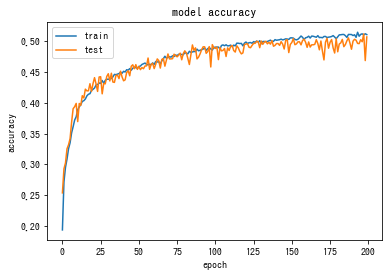

In [0]:

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()